In [1]:
N = 3
lamda = 3/4
a = 0
b = 10/6
koef = 10/6

#### Выбираем количество узлов сетки и получаем шаг

In [2]:
n = 20
h = (b - a) / n
print("n = ", n)
print("h = ", h)

n =  20
h =  0.08333333333333334


#### Задаем центрально равномерную сетку, и находим в её узлах значения функции

In [3]:
from sympy import Symbol, cos, sin
import pandas as pd
s = Symbol('s') 

In [4]:
y = koef*(s ** 2 - 11)

#### центрально равномерная сетка

In [5]:
x = [h/2]
x_pred = x[0]
for i in range(1, n):
    x_pred = x_pred + h
    x.append(x_pred) 
xdf = pd.DataFrame({"index":[i+1 for i in range(n)], "узлы":x})
xdf.set_index("index", inplace=True)
xdf

,узлы
index,
1,0.041667
2,0.125000
3,0.208333
4,0.291667
5,0.375000
6,0.458333
7,0.541667
8,0.625000
9,0.708333


#### Значения  узлах в этой сетки

In [6]:
y_ = []
for i in range(n):
    y_.append(y.subs(s, x[i]))
y_df = pd.DataFrame({"index":[i+1 for i in range(n)], "значения в узлах":y_})
y_df.set_index("index", inplace=True)
y_df

,значения в узлах
index,
1,-18.3304398148148
2,-18.3072916666667
3,-18.2609953703704
4,-18.1915509259259
5,-18.0989583333333
6,-17.9832175925926
7,-17.8443287037037
8,-17.6822916666667
9,-17.4971064814815


#### Задаем матрицу F согласно фурмуле $\newline F = (\delta^i_j-\lambda  K^i_j *h)^n_n = (f^i_j)^n_n$

$K(s, \tau) = \begin{equation*}
 \begin{cases}
   s(2 \frac{N + 7}{N+3} - \tau), 0\leq s \leq \tau; \newline
   \tau (2  \frac{N + 7}{N+3} - s), \tau \leq s \leq \frac{N + 7}{N+3} \newline
 \end{cases}
\end{equation*}$

In [7]:
def K(s, t):
    if (s >= 0 and s <= t):
        return s*(2 * 10/6 - t)
    elif (s >= t and s <= 10/6 + 0.01):
        return t*(2 * 10/6 - s)
    else:
        print(s,"  ", t)
        return 0

In [8]:
import numpy as np
E = np.eye(n)

In [9]:
F = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        F[i, j] = (E[i, j] - lamda * K(x[i], x[j]) * h)

In [10]:
F_df = pd.DataFrame()
F_df["index"] = [i+1 for i in range(n)]
for i in range(n):
    F_df[i+1] = F[i]
F_df.set_index("index", inplace=True)
F_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
index,,,,,,,,,,,,,,,,,,,,
1,0.991428,-0.008355,-0.008138,-0.007921,-0.007704,-0.007487,-0.007270,-0.007053,-0.006836,-0.006619,-0.006402,-0.006185,-0.005968,-0.005751,-0.005534,-0.005317,-0.005100,-0.004883,-0.004666,-0.004449
2,-0.008355,0.974935,-0.024414,-0.023763,-0.023112,-0.022461,-0.021810,-0.021159,-0.020508,-0.019857,-0.019206,-0.018555,-0.017904,-0.017253,-0.016602,-0.015951,-0.015299,-0.014648,-0.013997,-0.013346
3,-0.008138,-0.024414,0.959310,-0.039605,-0.038520,-0.037435,-0.036350,-0.035265,-0.034180,-0.033095,-0.032010,-0.030924,-0.029839,-0.028754,-0.027669,-0.026584,-0.025499,-0.024414,-0.023329,-0.022244
4,-0.007921,-0.023763,-0.039605,0.944553,-0.053928,-0.052409,-0.050890,-0.049371,-0.047852,-0.046332,-0.044813,-0.043294,-0.041775,-0.040256,-0.038737,-0.037218,-0.035699,-0.034180,-0.032661,-0.031141
5,-0.007704,-0.023112,-0.038520,-0.053928,0.930664,-0.067383,-0.065430,-0.063477,-0.061523,-0.059570,-0.057617,-0.055664,-0.053711,-0.051758,-0.049805,-0.047852,-0.045898,-0.043945,-0.041992,-0.040039
6,-0.007487,-0.022461,-0.037435,-0.052409,-0.067383,0.917643,-0.079970,-0.077582,-0.075195,-0.072808,-0.070421,-0.068034,-0.065647,-0.063260,-0.060872,-0.058485,-0.056098,-0.053711,-0.051324,-0.048937
7,-0.007270,-0.021810,-0.036350,-0.050890,-0.065430,-0.079970,0.905490,-0.091688,-0.088867,-0.086046,-0.083225,-0.080404,-0.077582,-0.074761,-0.071940,-0.069119,-0.066298,-0.063477,-0.060655,-0.057834
8,-0.007053,-0.021159,-0.035265,-0.049371,-0.063477,-0.077582,-0.091688,0.894206,-0.102539,-0.099284,-0.096029,-0.092773,-0.089518,-0.086263,-0.083008,-0.079753,-0.076497,-0.073242,-0.069987,-0.066732
9,-0.006836,-0.020508,-0.034180,-0.047852,-0.061523,-0.075195,-0.088867,-0.102539,0.883789,-0.112522,-0.108832,-0.105143,-0.101454,-0.097765,-0.094076,-0.090386,-0.086697,-0.083008,-0.079319,-0.075629


#### Найдем обратную матрицу F

In [11]:
F_inv = np.linalg.inv(F)
F_inv_df = pd.DataFrame()
F_inv_df["index"] = [i+1 for i in range(n)]
for i in range(n):
    F_inv_df[i+1] = F_inv[i]
F_inv_df.set_index("index", inplace=True)
F_inv_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
index,,,,,,,,,,,,,,,,,,,,
1,1.008006,0.006518,0.004917,0.003231,0.001488,-0.000280,-0.002043,-0.003771,-0.005434,-0.007002,-0.008449,-0.009749,-0.010879,-0.011821,-0.012558,-0.013076,-0.013368,-0.013427,-0.013254,-0.012850
2,0.006518,1.019442,0.014666,0.009637,0.004439,-0.000835,-0.006095,-0.011248,-0.016207,-0.020884,-0.025199,-0.029076,-0.032449,-0.035258,-0.037455,-0.039001,-0.039871,-0.040048,-0.039531,-0.038326
3,0.004917,0.014666,1.024161,0.015875,0.007313,-0.001375,-0.010040,-0.018530,-0.026699,-0.034404,-0.041512,-0.047899,-0.053455,-0.058082,-0.061702,-0.064250,-0.065682,-0.065974,-0.065121,-0.063137
4,0.003231,0.009637,0.015875,1.021838,0.010060,-0.001892,-0.013811,-0.025490,-0.036727,-0.047327,-0.057104,-0.065891,-0.073533,-0.079899,-0.084877,-0.088382,-0.090353,-0.090755,-0.089581,-0.086852
5,0.001488,0.004439,0.007313,0.010060,1.012633,-0.002375,-0.017342,-0.032008,-0.046118,-0.059428,-0.071705,-0.082738,-0.092334,-0.100328,-0.106579,-0.110981,-0.113455,-0.113960,-0.112486,-0.109060
6,-0.000280,-0.000835,-0.001375,-0.001892,-0.002375,0.997182,-0.020572,-0.037970,-0.054708,-0.070497,-0.085061,-0.098149,-0.109533,-0.119015,-0.126431,-0.131652,-0.134588,-0.135186,-0.133438,-0.129373
7,-0.002043,-0.006095,-0.010040,-0.013811,-0.017342,-0.020572,0.976554,-0.043273,-0.062349,-0.080342,-0.096941,-0.111856,-0.124830,-0.135636,-0.144088,-0.150038,-0.153383,-0.154066,-0.152074,-0.147441
8,-0.003771,-0.011248,-0.018530,-0.025490,-0.032008,-0.037970,-0.043273,0.952176,-0.068906,-0.088792,-0.107137,-0.123621,-0.137959,-0.149903,-0.159243,-0.165819,-0.169516,-0.170271,-0.168069,-0.162949
9,-0.005434,-0.016207,-0.026699,-0.036727,-0.046118,-0.054708,-0.062349,-0.068906,0.925732,-0.095701,-0.115473,-0.133240,-0.148694,-0.161566,-0.171634,-0.178722,-0.182706,-0.183519,-0.181146,-0.175628


### Тогда значения функции x(s) 

In [12]:
chsl_r = F_inv.dot(y_)
chsl_r_df = pd.DataFrame({"index":[i+1 for i in range(n)], "численное решение":chsl_r})
chsl_r_df.set_index("index", inplace=True)
chsl_r_df

,численное решение
index,
1,-16.5941886046602
2,-12.8104444840387
3,-8.78114866519889
4,-4.57625420055123
5,-0.268762730106964
6,4.06654290810537
7,8.35439699120012
8,12.5203576080125
9,16.4920990533894


### Сравним полученные резузльтаты для аналитического и численного методов

In [13]:
A = -59/3
B = 26.4418
w = (5/2)**(1/2)

In [14]:
x_s = A*cos(s*w) +B*sin(s*w) + 4/3

In [15]:
an_r = np.zeros(n)
for i in range(n):
    an_r[i] = x_s.subs(s, x[i])
an_r_df = pd.DataFrame({"index":[i+1 for i in range(n)], "аналит. решение":an_r})
an_r_df.set_index("index", inplace=True)
an_r_df

,аналит. решение
index,
1,-16.549923
2,-12.758405
3,-8.722593
4,-4.512451
5,-0.200967
6,4.137116
7,8.426593
8,12.593100
9,16.564409


In [16]:
abs_error = abs(an_r-chsl_r)
abs_error_df = pd.DataFrame({"index":[i+1 for i in range(n)], "Абсолютная погрешность":abs_error})
abs_error_df.set_index("index", inplace=True)
abs_error_df

,Абсолютная погрешность
index,
1,0.0442659062924164
2,0.0520394031332820
3,0.0585556957799849
4,0.0638029644057667
5,0.0677957970155276
6,0.0705731040012338
7,0.0721955663311284
8,0.0727426942022547
9,0.0723095799493620


In [17]:
otn_error_df = pd.DataFrame({"index":[i+1 for i in range(n)], "Относительная погрешность":abs(abs_error/an_r)})
otn_error_df.set_index("index", inplace=True)
otn_error_df

,Относительная погрешность
index,
1,0.00267468961028936
2,0.00407883295782524
3,0.00671310652523613
4,0.0141393138821523
5,0.337348020257053
6,0.0170585267115336
7,0.00856758717574446
8,0.00577639282277943
9,0.00436535837469177


#### Средняя относительная погрешность

In [18]:
np.mean(abs(abs_error/an_r))

0.0210903719128543

### Графическое сравнение

In [21]:
import matplotlib.pyplot as plt

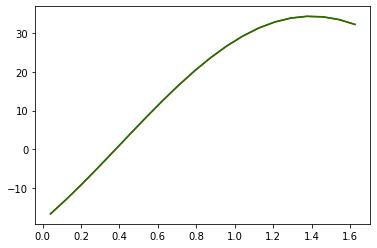

In [27]:
plt.plot(x, chsl_r, color='r')
plt.plot(x, an_r, color='g')
plt.show()